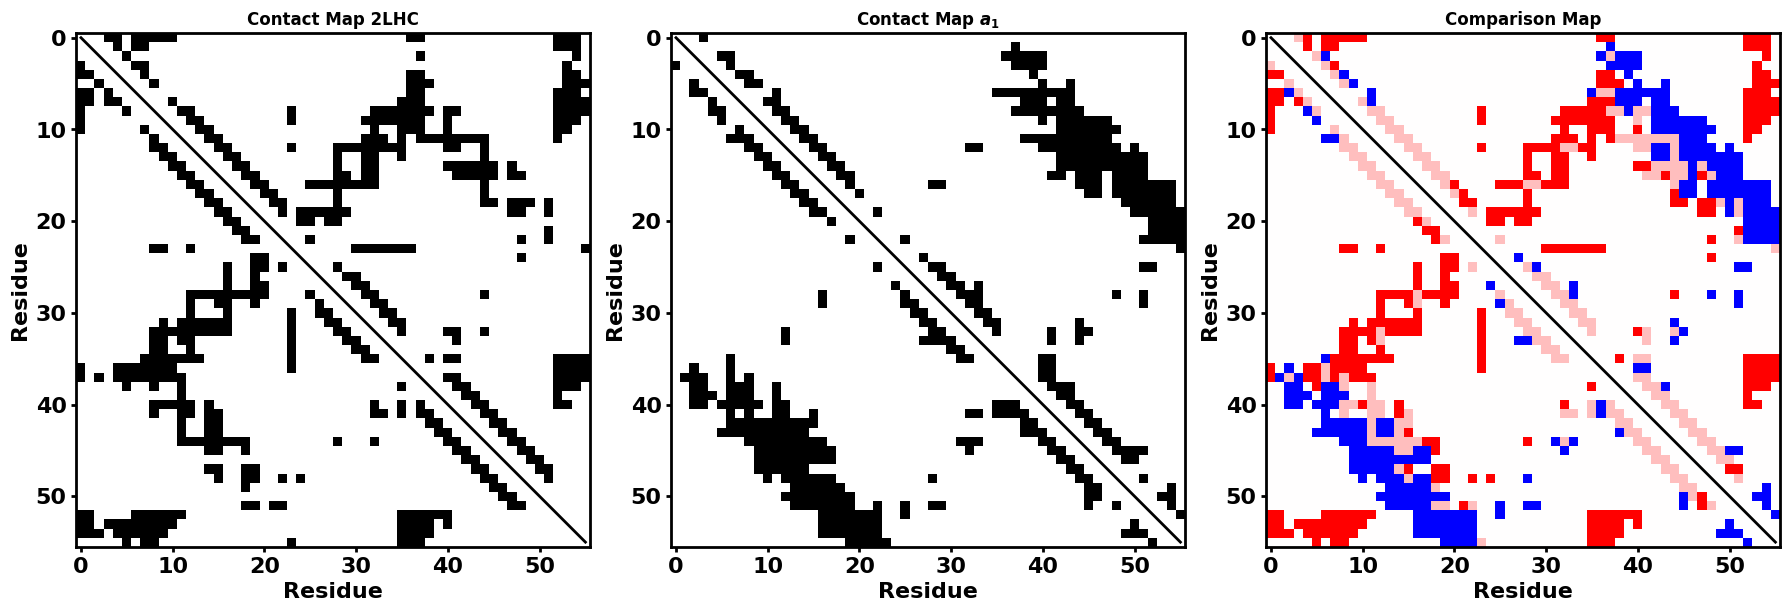

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Function to read the contact file and create the contact map matrix
def read_contact_map(file, n_residues):
    contact_map = np.zeros((n_residues, n_residues))  # Initialize an NxN matrix
    with open(file, 'r') as f:
        for line in f:
            res1, res2 = map(int, line.split())
            contact_map[res1-1, res2-1] = 1  # Subtract 1 to match Python indexing
            contact_map[res2-1, res1-1] = 1  # Since the contact map is symmetric
    return contact_map
rcParams['font.weight'] = 'bold'
# Load contact maps from two files
n_residues = 56  # Adjust based on your data
file1 = 'contact-profile-2LHC-lt-7.5'
file2 = 'contact-profile-rank1-lt-7.5'

contact_map1 = read_contact_map(file1, n_residues)
contact_map2 = read_contact_map(file2, n_residues)

# Calculate the difference map
difference_map = contact_map1 - contact_map2

# Create a combined map to highlight common contacts
combined_map = np.zeros((n_residues, n_residues))
combined_map[contact_map1 == 1] = 1  # Red: Contact in Map 1 only
combined_map[contact_map2 == 1] = -1  # Blue: Contact in Map 2 only
combined_map[(contact_map1 == 1) & (contact_map2 == 1)] = 0.25  # Green: Contact in both maps
# Set up the plotting style for bold axes, ticks, and increased size
def style_axes(ax):
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    
    ax.tick_params(axis='both', which='major', labelsize=16, width=2)
    ax.tick_params(axis='both', which='minor', labelsize=16, width=2)

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 10))

# Plot first contact map
ax[0].imshow(contact_map1, cmap='Greys', interpolation='none')
ax[0].set_title('Contact Map 2LHC', fontweight='bold')
ax[0].set_xlabel('Residue', fontweight='bold',fontsize=16)
ax[0].set_ylabel('Residue', fontweight='bold',fontsize=16)
style_axes(ax[0])

# Plot second contact map
ax[1].imshow(contact_map2, cmap='Greys', interpolation='none')
ax[1].set_title(r'Contact Map $a_{1}$', fontweight='bold')
ax[1].set_xlabel('Residue', fontweight='bold',fontsize=16)
ax[1].set_ylabel('Residue', fontweight='bold',fontsize=16)
style_axes(ax[1])

# Plot combined difference map with diagonal
cmap = plt.get_cmap('bwr')  # Red for map 1, blue for map 2
ax[2].imshow(combined_map, cmap=cmap, interpolation='none')
ax[2].set_title('Comparison Map', fontweight='bold')
ax[2].set_xlabel('Residue', fontweight='bold',fontsize=16)
ax[2].set_ylabel('Residue', fontweight='bold',fontsize=16)
style_axes(ax[2])

# Add diagonal line
ax[0].plot(np.arange(n_residues), np.arange(n_residues), color='black', linestyle='-', linewidth=2)
ax[1].plot(np.arange(n_residues), np.arange(n_residues), color='black', linestyle='-', linewidth=2)
ax[2].plot(np.arange(n_residues), np.arange(n_residues), color='black', linestyle='-', linewidth=2)

plt.savefig('contact_map_2LHC_rank1_lt_7.5_a1.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()
